In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dados = pd.read_csv(r'C:\Users\uilli\OneDrive\Área de Trabalho\Estudo\Python\Estatistica\Curso_estatistica\Conjunto_dados\dados.csv')


In [4]:
type(dados)

pandas.core.frame.DataFrame

In [5]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [6]:
#variaveis qualitativas ordinais
sorted(dados['Anos de Estudo'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17)]

In [7]:
#Vaiaveis Qualitativas nominais

sorted(dados['UF'].unique())

[np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(35),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53)]

In [8]:
sorted(dados['Sexo'].unique())

[np.int64(0), np.int64(1)]

In [9]:
sorted(dados['Cor'].unique())

[np.int64(0), np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [10]:
#variaveis quantitativas discretas

dados.Idade.min()

np.int64(13)

In [11]:
dados.Idade.max()

np.int64(99)

In [12]:
# Qualitativas Ordinais: Expressam atributos com ordem lógica.
# Qualitativas Nominais: Expressam atributos sem ordem lógica.
# Quantitativas Discretas: Representam contagens de números inteiros.
# Quantitativas Contínuas: Representam medições com valores fracionados.

In [13]:
#analise descritiva do dados
#vamos iniciar com as variavies qualitativas:
#O código "0" se refere ao sexo Masculino.
#O código "1" se refere ao sexo Feminino.

dados['Sexo'].value_counts()
frequencia_sexo = dados['Sexo'].value_counts()

In [14]:
dados['Sexo'].value_counts(normalize= True) * 100
percentual_sexo = dados['Sexo'].value_counts(normalize= True) * 100

In [15]:
dist_ferquencia_qualitativas = pd.DataFrame({'Frequenncia_sexo':frequencia_sexo,'Porcentagem (%)':percentual_sexo})
dist_ferquencia_qualitativas

,Frequenncia_sexo,Porcentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [16]:
dist_ferquencia_qualitativas.rename(index={0:'Masculino',1:'Feminino'},inplace= True)
dist_ferquencia_qualitativas

,Frequenncia_sexo,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [17]:
dist_ferquencia_qualitativas.rename_axis('Sexo',axis='columns',inplace= True)
dist_ferquencia_qualitativas

Sexo,Frequenncia_sexo,Porcentagem (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [18]:
#usando Cross tab com Pandas
sexo = {0: 'Masculino',
       1: 'Feminino'}

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

frequencia_crostab = pd.crosstab(dados.Sexo,
                                 dados.Cor)
frequencia_crostab.rename(index=sexo,inplace= True)
frequencia_crostab.rename(columns=cor,inplace= True)
frequencia_crostab                

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [19]:
frequencia_crostab_porcen = pd.crosstab(dados.Sexo,
                                 dados.Cor
                                 ,normalize= True) * 100
frequencia_crostab_porcen.rename(index=sexo,inplace= True)
frequencia_crostab_porcen.rename(columns=cor,inplace= True)
frequencia_crostab_porcen  

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [20]:
frequencia_crostab_porcen = pd.crosstab(dados.Sexo,
                                 dados.Cor
                                 ,aggfunc= 'mean'
                                 ,values= dados.Renda) 
frequencia_crostab_porcen.rename(index=sexo,inplace= True)
frequencia_crostab_porcen.rename(columns=cor,inplace= True)
frequencia_crostab_porcen  

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [21]:
#definindo distribuição de Frequencia para variavies Quantitativas
#Neste exemplo, as classes foram definidas da seguinte forma:
#Classe E: de 0 até 1576 (0 até 2 salários mínimos)
#Classe D: de 1576 até 3152 (de 2 até 4 salários mínimos)
#Classe C: de 3152 até 7880 (de 4 até 10 salários mínimos)
#Classe B: de 7880 até 15760 (de 10 até 20 salários mínimos)
#Classe A: acima de 15760 (acima de 20 salários mínimos)
#Essas classes foram criadas com base no valor do salário mínimo em 2015, que era de R$788,00. Então os limites das classes foram definidos em função do número de salários mínimos.

dados.Renda.min()

np.int64(0)

In [22]:

dados.Renda.max()


np.int64(200000)

In [23]:
classes = [0,1573,3152,7880,15760,200000]
labels = ['E','D','C','B','A']

In [24]:
pd.cut(x = dados.Renda
       ,bins= classes,
        labels= labels,
        include_lowest= True
        )

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [25]:
frequencia_renda = pd.value_counts(
    pd.cut(x = dados.Renda
       ,bins= classes,
        labels= labels,
        include_lowest= True
        )
)
frequencia_renda

C:\Users\uilli\AppData\Local\Temp\ipykernel_17684\342562780.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_renda = pd.value_counts(


Renda
E    49352
D    17103
C     7599
B     2178
A      608
Name: count, dtype: int64

In [26]:
frequencia_renda_percen = pd.value_counts(
    pd.cut(x = dados.Renda
       ,bins= classes,
        labels= labels,
        include_lowest= True
        )
    ,normalize= True
) * 100
frequencia_renda_percen

C:\Users\uilli\AppData\Local\Temp\ipykernel_17684\3372651388.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_renda_percen = pd.value_counts(


Renda
E    64.226965
D    22.257939
C     9.889381
B     2.834461
A     0.791255
Name: proportion, dtype: float64

In [27]:
dist_ferquencia_quantitativas_personalizadas = pd.DataFrame({'Frequencia Renda':frequencia_renda,'Porcentagem (%)':frequencia_renda_percen})
dist_ferquencia_quantitativas_personalizadas

,Frequencia Renda,Porcentagem (%)
Renda,,
E,49352,64.226965
D,17103,22.257939
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [28]:
#ordenar
dist_ferquencia_quantitativas_personalizadas.sort_index(ascending= False)

,Frequencia Renda,Porcentagem (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,17103,22.257939
E,49352,64.226965


In [29]:
classes = [dados.Altura.min(), 1.65, 1.75, dados.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = dados.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

C:\Users\uilli\AppData\Local\Temp\ipykernel_17684\1120227437.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(
C:\Users\uilli\AppData\Local\Temp\ipykernel_17684\1120227437.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


In [30]:
#numero de Classes 
#Regra de Strurges


n = dados.shape
n

(76840, 7)

In [31]:
k = 1 + (10/3) * np.log10(n)
k = np.round(k).astype(int)
k

array([17,  4])

In [32]:
frequencia_classe_renda = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins= 17,
        include_lowest= True

    ),
    sort =False
)

C:\Users\uilli\AppData\Local\Temp\ipykernel_17684\2073004295.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_classe_renda = pd.value_counts(


In [33]:
frequencia_classe_renda_perc = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins= 17,
        include_lowest= True

    ),
    sort =False,
    normalize= True
) *100
frequencia_classe_renda_perc

C:\Users\uilli\AppData\Local\Temp\ipykernel_17684\1695040365.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_classe_renda_perc = pd.value_counts(


Renda
(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: proportion, dtype: float64

In [34]:
dist_ferquencia_quantitativas_amplitude_fixa = pd.DataFrame({'Frequencia Renda':frequencia_classe_renda,'Porcentagem (%)':frequencia_classe_renda_perc})
dist_ferquencia_quantitativas_amplitude_fixa
dist_ferquencia_quantitativas_amplitude_fixa.rename_axis('Faixa Salarial', axis= 'columns', inplace = True)

dist_ferquencia_quantitativas_amplitude_fixa.sort_index(ascending = True, inplace = True)

dist_ferquencia_quantitativas_amplitude_fixa

Faixa Salarial,Frequencia Renda,Porcentagem (%)
Renda,,
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Count'>

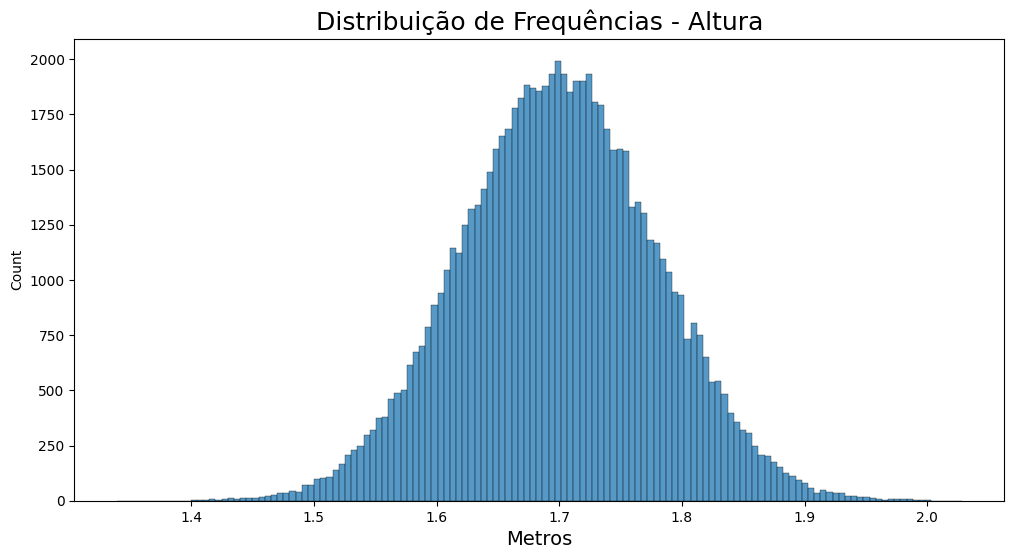

In [35]:
ax = sns.histplot (dados.Altura, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

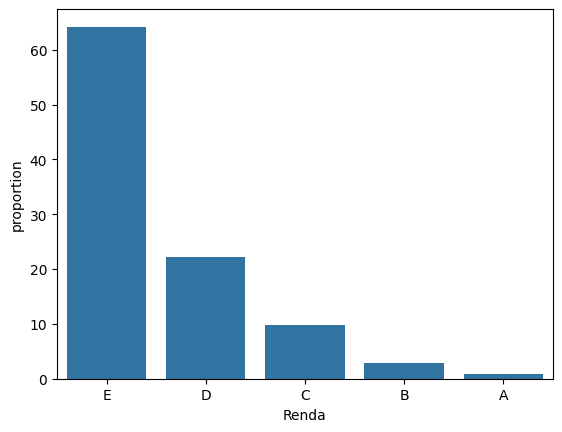

In [36]:
t = sns.barplot(frequencia_renda_percen)

In [37]:
#media(Nao se aplica muito bem)

dados.Renda.mean()

np.float64(2000.3831988547631)

In [38]:
dados.groupby('Sexo').mean()

,UF,Idade,Cor,Anos de Estudo,Renda,Altura
Sexo,,,,,,
0,31.901991,44.046554,5.038685,9.120169,2192.441596,1.699443
1,31.937728,44.127554,5.018906,10.258584,1566.847393,1.699670


In [39]:
dados.groupby('Sexo')['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [41]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [43]:
dataset.groupby('Sexo')['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

In [44]:
dataset.Idade.mean()

np.float64(46.1)

In [45]:
#mediana 

dataset.Idade.median()

np.float64(47.5)

In [46]:
dados.Renda.median()

np.float64(1200.0)

In [47]:
#Moda  Muito util com valores qualitativos

dados.Renda.mode()

0    788
Name: Renda, dtype: int64

In [48]:

dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

In [49]:
# Relação de tendencias:
# Simetria: A média, mediana e moda são iguais ou muito próximas, com uma distribuição simétrica dos dados.
# Assimetria à Direita: A moda é menor que a mediana, que é menor que a média, com uma concentração maior de valores menores.
# Assimetria à Esquerda: A moda é maior que a mediana, que é maior que a média, com uma concentração maior de valores maiores.

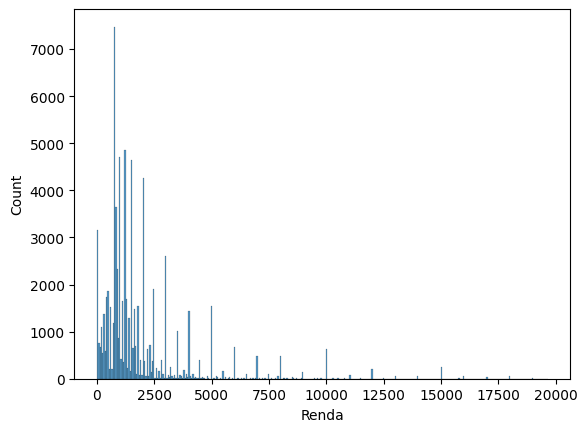

In [51]:
ax = sns.histplot(dados.query('Renda < 20000').Renda)

In [61]:
media_renda = dados.Renda.mean()
mediana_renda = dados.Renda.median()
moda_renda = dados.Renda.mode()


In [63]:
#moda_renda < mediana_renda < media_renda assimetria a direita

SyntaxError: 'return' outside function (1651384266.py, line 2)

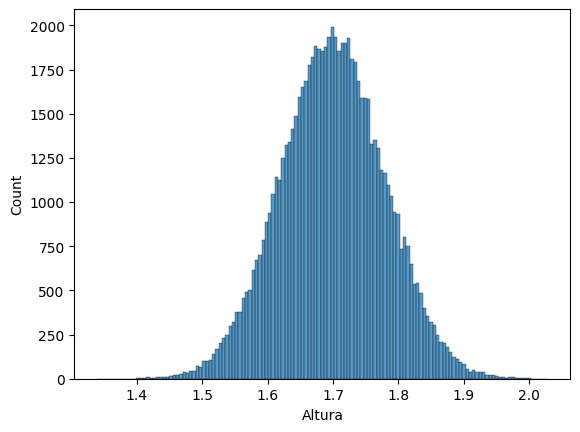

In [64]:
ax = sns.histplot(dados.Altura)

In [66]:
#Simetria: 
media_altura = dados.Altura.mean()
mediana_altura = dados.Altura.median()
moda_altura = dados.Altura.mode()

In [70]:
# Quartis 
dados.Renda.quantile([0.25,0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [73]:
# decis com for

[i /10 for i in range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
dados.Renda.quantile([i /10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [76]:
#percentis

dados.Renda.quantile([i /100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

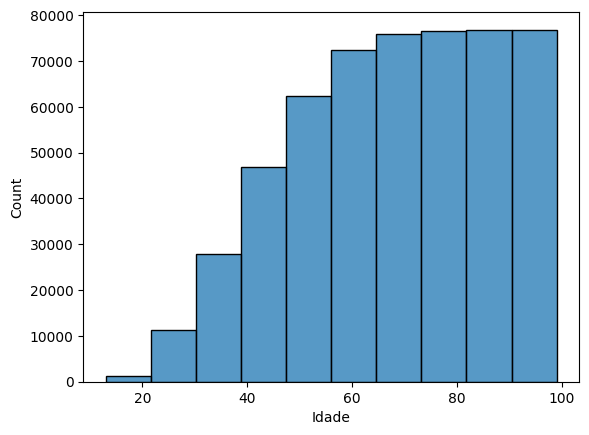

In [79]:
ax = sns.histplot(dados.Idade
                  ,cumulative=True
                  ,bins= 10)

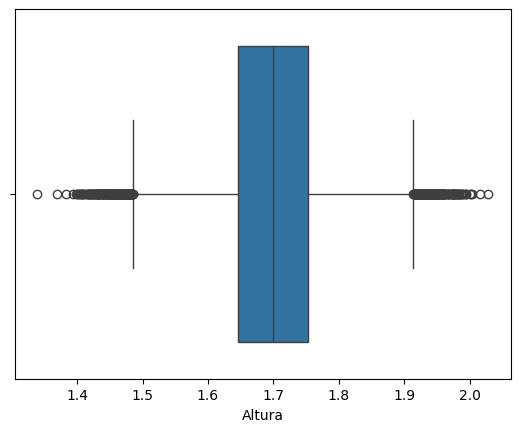

In [81]:
ax = sns.boxplot(x= 'Altura', data = dados, orient= 'h')

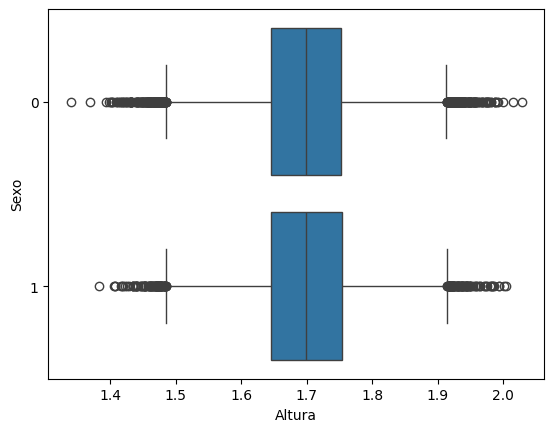

In [82]:
ax = sns.boxplot(x= 'Altura', y = 'Sexo',data = dados, orient= 'h')

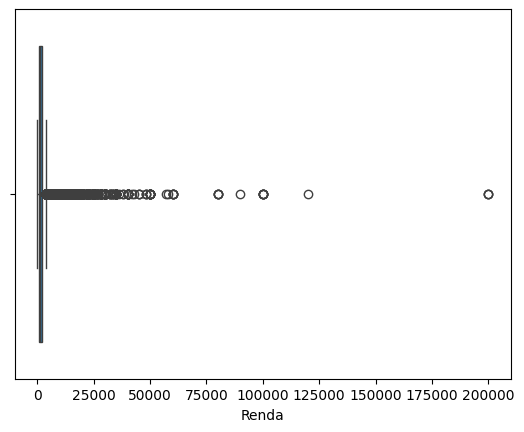

In [83]:
ax = sns.boxplot(x= 'Renda', data = dados, orient= 'h')

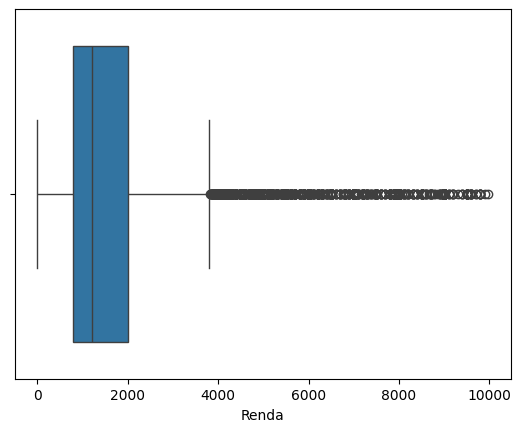

In [84]:
ax = sns.boxplot(x= 'Renda', data = dados.query('Renda < 10000'), orient= 'h')

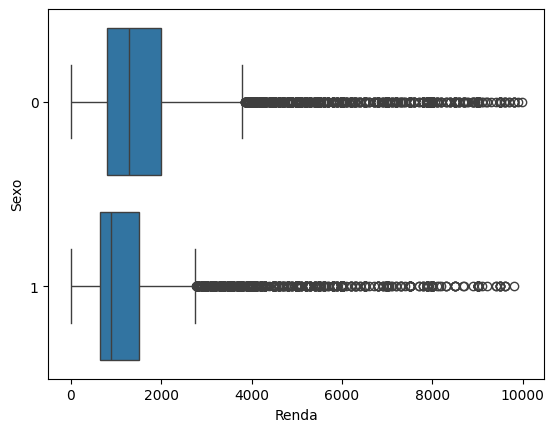

In [86]:
ax = sns.boxplot(x= 'Renda',y='Sexo', data = dados.query('Renda < 10000'), orient= 'h')

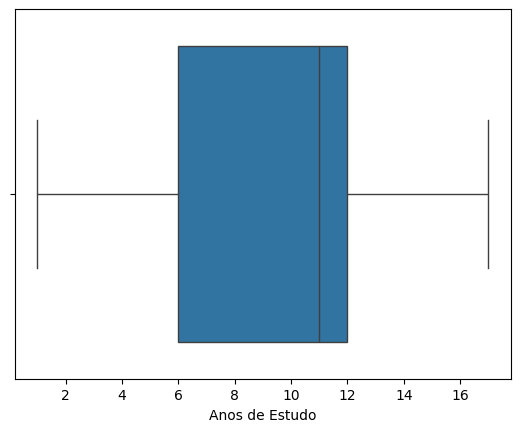

In [87]:
ax = sns.boxplot(x= 'Anos de Estudo', data = dados, orient= 'h')


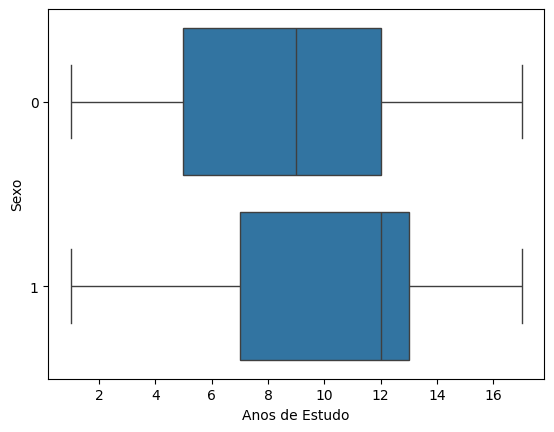

In [89]:
ax = sns.boxplot(x= 'Anos de Estudo',y='Sexo', data = dados, orient= 'h')
